**Processamento Digital de Imagens - 2022/01**<br/>
**Engenharia da Computação**<br/>
**Aluno:** Gabriel Soares Baptista, 2018102117<br/>

### Questão 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from typing import Tuple

### Funções auxiliares

In [2]:
def image_plot(image: np.array, size: Tuple[int, int], scaled: bool = False) -> None:
    """ Plota a imagem com as informações passadas """
    plt.figure(figsize=size)
    if not scaled:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.show()

### Resolução

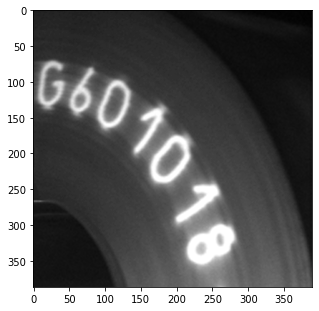

In [3]:
# read image as double
image = np.array(Image.open('../images/image.png'), dtype=np.double)
# convert to gray scale
image = image.convert('L')
image_plot(image, (5, 6))

Uma solução para esse problema utiliza-se do modelo multiplicativo entre refletância e iluminância, para isso, considera-se que a imagem definida pela função $f(x,y)$ pode ser caracterizada por dois componentes, a iluminação da fonte que incide na cena e a quantidade de iluminação refletida pelos objetos na cena.

Portanto, podemos definir a função da imagem na forma:
$$
f(x, y) = i(x,y)r(x,y) \\
$$

onde

$$
0 \lt i(x,y) \lt \infty \\
\text{e} \\
0 \lt r(x,y) \lt 1
$$

Podemos utilizar o modelo iluminação-refletância definido para desenvolver um procedimento no domínio da frequência que melhor a aparência da imagem através da compressão da faixa de intensidade e o realce do contraste. Entretanto, o modelo não pode ser utilizado diretamente sobre os componentes de frequência, uma vez que a transformada de Fourier de um produto não é o produto das transformadas. Portanto, a operação é aplicada sobre o logarítmo da imagem.

$$
z(x, y) = ln f(x, y) \\
\qquad\qquad\qquad\qquad = \text{ln } i(x, y) + \text{ln } r(x, y) 
$$

Portanto, podemos filtrar $Z(x, y)$ utilizando um filtro $H(u,v)$ de forma que $S(u,v) = H(u,v)Z(u,v) = H(u,v)F_i(u,v) + H(u,v)F_r(u,v)$.

In [4]:
image_log = np.log(image + 0.01)
image_fill = np.zeros((2*image.shape[0], 2*image.shape[1]))
image_fill[0:image.shape[0],0:image.shape[1]] = image_log
F_shift = np.fft.fftshift(np.fft.fft2(image_fill))

Essa metodologia é denominada de `sistemas homomórficos`, onde separa-se as componentes de iluminação e refletância, nos permitindo atuar separadamente sobre elas.

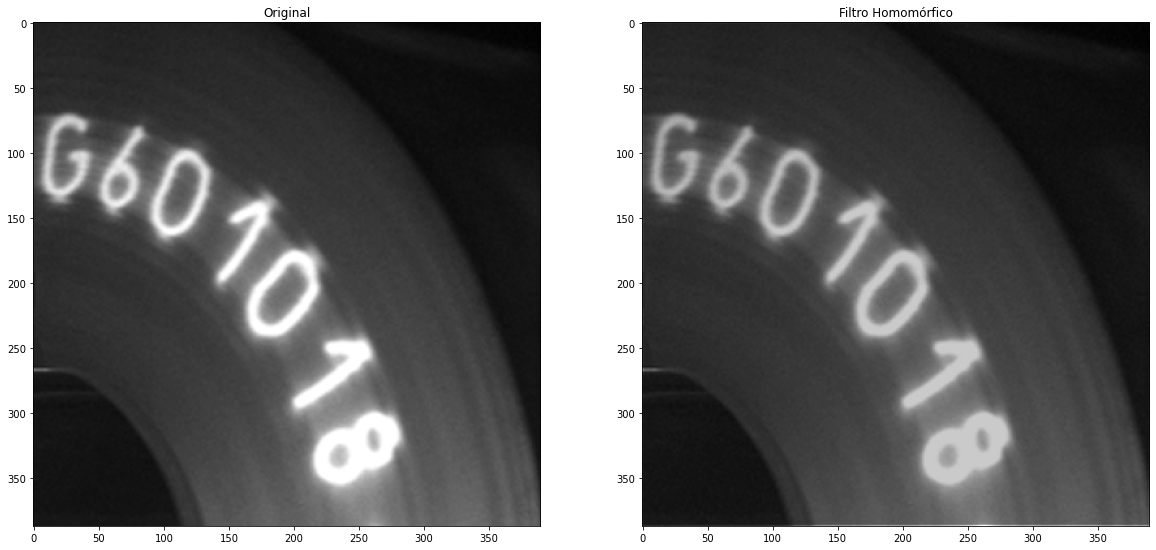

In [9]:
im2 = np.log(image + 0.01)
im_fill = np.zeros((2*im2.shape[0], 2*im2.shape[1]))
im_fill[0:im2.shape[0],0:im2.shape[1]] = im2
F_shift = np.fft.fftshift(np.fft.fft2(im_fill))

y = np.arange(-im2.shape[0], im2.shape[0], 1)
x = np.arange(-im2.shape[1], im2.shape[1], 1) 
u, v = np.meshgrid(x, y)
D = np.sqrt(u**2 + v**2)

c = 1
d0 = 320
yh = 1.4
yl = 0.8

H = (yh - yl)*(1 - np.exp(-c*(D**2/d0**2))) + yl

# Filtragem Homomórfico 
G_homomorfico = F_shift*H
im_homomorfico_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_homomorfico)))
im_homomorfico = im_homomorfico_fill[0:im2.shape[0],0:im2.shape[1]]
im_homomorfico = np.exp(im_homomorfico)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 20)) 
axs[0].imshow(image,cmap='gray')
axs[1].imshow(im_homomorfico,cmap='gray') 
axs[0].set_title('Original')
axs[1].set_title('Filtro Homomórfico')
plt.show()

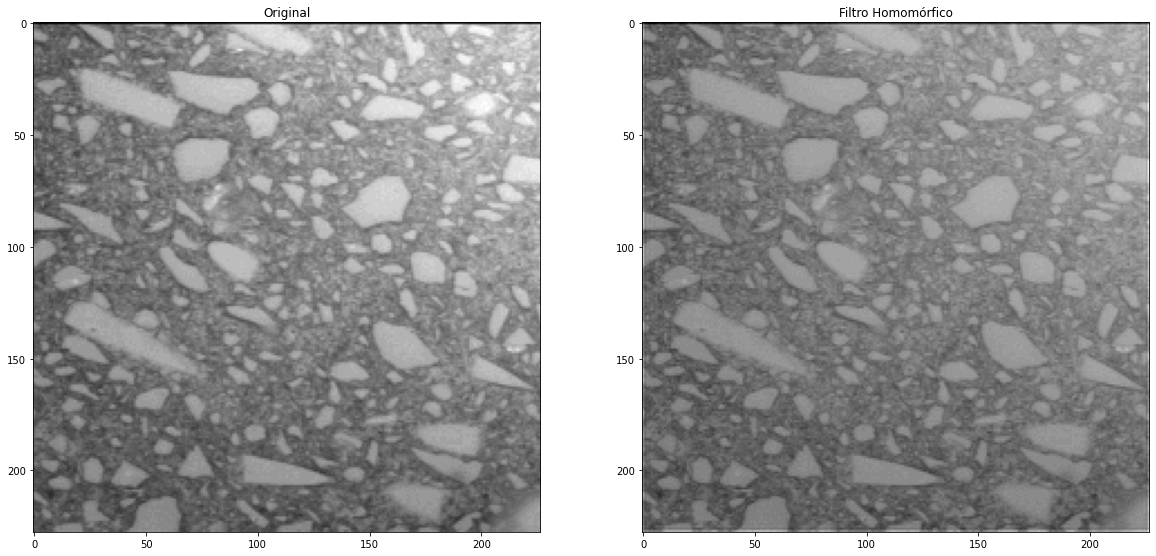

In [82]:
from PIL import Image
image = np.array(Image.open('../images/mar-il.gif').convert('L'))

im2 = np.log(image)
im_fill = np.zeros((2*im2.shape[0], 2*im2.shape[1]))
im_fill[0:im2.shape[0],0:im2.shape[1]] = im2
F_shift = np.fft.fftshift(np.fft.fft2(im_fill))

y = np.arange(-im2.shape[0], im2.shape[0], 1)
x = np.arange(-im2.shape[1], im2.shape[1], 1) 
u, v = np.meshgrid(x, y)
D = np.sqrt(u**2 + v**2)

c = 2
d0 = 1000
yh = 2.5
yl = 0.5

H = (yh - yl)*(1 - np.exp(-c*(D**2/d0**2))) + yl

# Filtragem Homomórfico 
G_homomorfico = F_shift*H
im_homomorfico_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_homomorfico)))
im_homomorfico = im_homomorfico_fill[0:im2.shape[0],0:im2.shape[1]]
im_homomorfico = np.exp(im_homomorfico)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 20)) 
axs[0].imshow(image,cmap='gray')
axs[1].imshow(im_homomorfico,cmap='gray') 
axs[0].set_title('Original')
axs[1].set_title('Filtro Homomórfico')
plt.show()